In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("combined_eeg_data.csv")
df.head()

,channel0,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,channel9,channel10,channel11,channel12,channel13,channel14,channel15,label,file_name
0,-30.06,259.96,39.79,-210.44,79.58,9.73,-90.19,-150.32,-150.32,99.92,-110.53,59.24,-10.61,9.73,379.33,0.00,0,s12w1.eea.csv
1,-70.74,259.96,39.79,-250.23,99.92,-20.34,-10.61,-150.32,-210.44,179.50,-30.06,149.43,9.73,-70.74,439.46,9.73,0,s12w1.eea.csv
2,-90.19,219.29,79.58,-110.53,39.79,59.24,119.37,-70.74,-90.19,199.83,119.37,159.16,39.79,-10.61,439.46,-20.34,0,s12w1.eea.csv
3,29.18,269.69,129.98,-20.34,39.79,99.92,179.50,-10.61,0.00,179.50,209.56,109.64,89.31,19.45,359.88,19.45,0,s12w1.eea.csv
4,229.90,419.12,159.16,119.37,59.24,219.29,219.29,39.79,199.83,79.58,239.62,-70.74,79.58,79.58,59.24,-50.40,0,s12w1.eea.csv


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(['label', 'file_name'], axis=1)  # EEG channels --- features
y = df['label']  # labels --- target (0 for healthy, 1 for schizophrenic)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred_rf = rf_model.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

In [13]:
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Classification Report:")
print(class_report_rf)

Random Forest Accuracy: 0.7533
Random Forest Confusion Matrix:
[[39339 18934]
 [12134 55545]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72     58273
           1       0.75      0.82      0.78     67679

    accuracy                           0.75    125952
   macro avg       0.76      0.75      0.75    125952
weighted avg       0.75      0.75      0.75    125952



In [14]:
import seaborn as sns

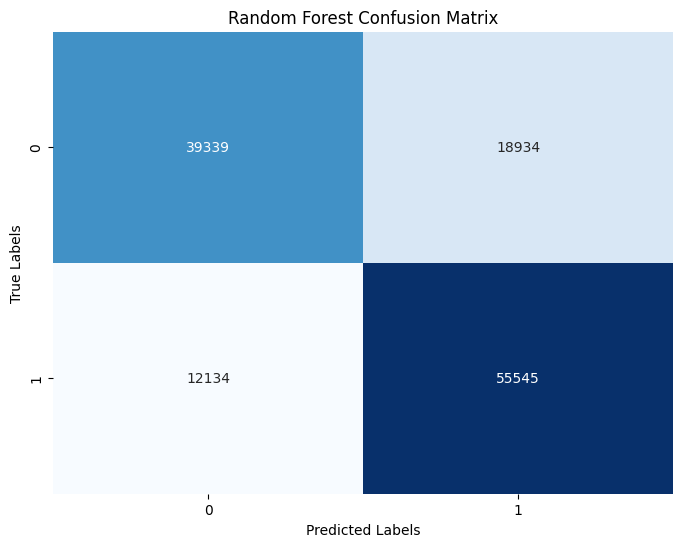

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [16]:
import pickle

In [17]:
with open('model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)